In [1]:
import tensorflow as tf
import os

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:155: UserWarning: A NumPy version >=1.18.5 and <1.25.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
#To Avoid Out of memory error 
gpus=tf.config.experimental.list_physical_devices('GPU')
for gpu in gpus:
    tf.config.experimental.set_memory_growth(gpu,True)

In [3]:
import cv2
import imghdr
import matplotlib.pyplot as plt  

In [4]:
data_dir='data'

In [5]:
image_exts=['jpeg','jpg','bmp','png']


In [6]:
img=cv2.imread(os.path.join('data','happy','smile-woman_.jpg'))


In [7]:
type(img)

numpy.ndarray

In [8]:
img.shape

(3844, 5125, 3)

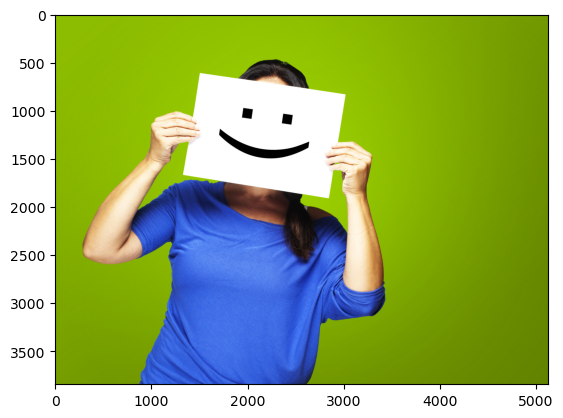

In [9]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir,image_class)):
        image_path=os.path.join(data_dir,image_class,image)
        try:
            img=cv2.imread(image_path)
            tip=imghdr.what(image_path)
            if tip not in image_exts:
                print(f'image not in ext list {image_path}')
                os.remove(image_path)
        except Exception as e:
            print(f'Issue with image {image_path}')
                
            
    

In [11]:
import numpy as np
data=tf.keras.utils.image_dataset_from_directory('data')


Found 170 files belonging to 2 classes.


In [12]:
data_iterator=data.as_numpy_iterator()

In [13]:
batch=data_iterator.next()

In [14]:
len(batch)

2

In [15]:
# represent numpy arrays
batch[0].shape

(32, 256, 256, 3)

In [16]:
#represent labels
batch[1]

array([1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 1])

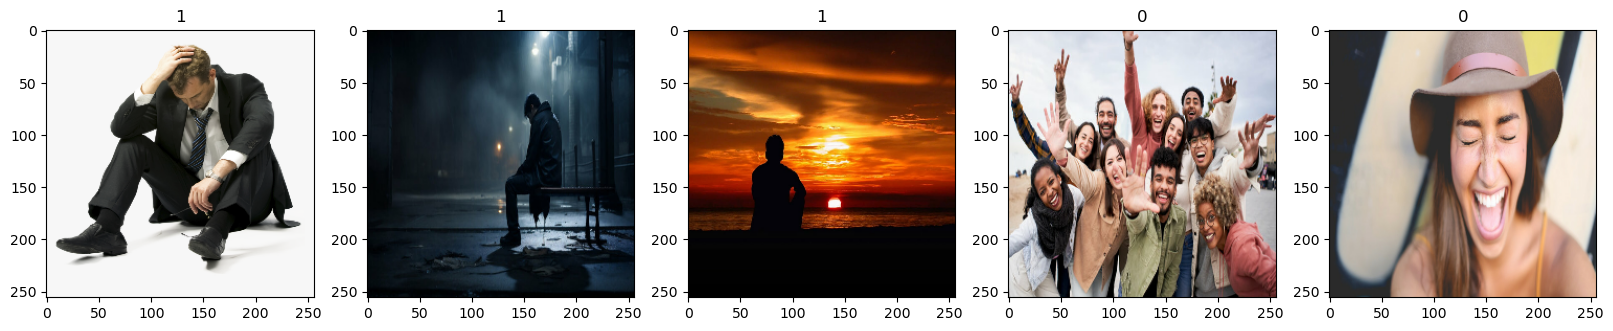

In [17]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [18]:
data=data.map(lambda x,y:(x/255,y))

In [19]:
scaled_iterator=data.as_numpy_iterator()

In [20]:
batch=scaled_iterator.next()

In [21]:
batch[0].max()

1.0

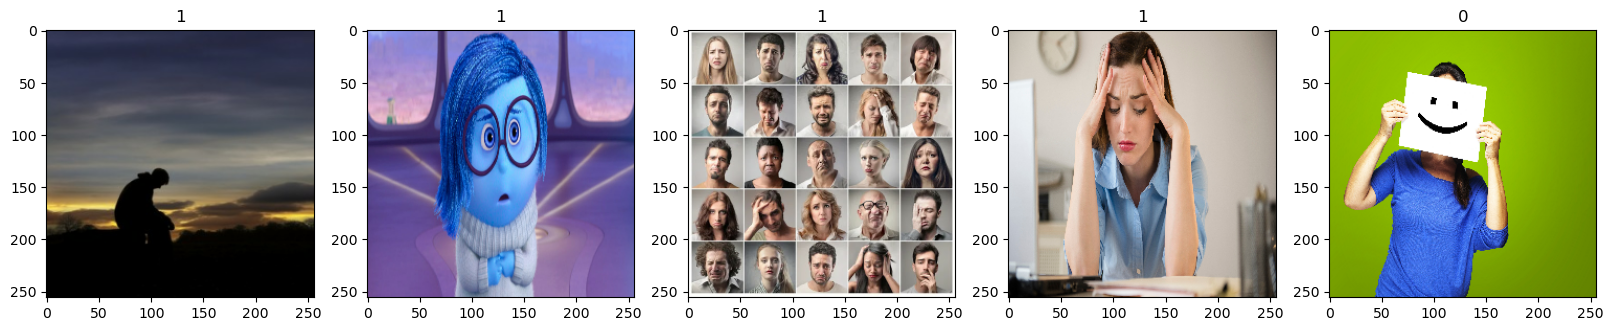

In [22]:
fig,ax=plt.subplots(ncols=5,figsize=(20,20))
for idx,img in enumerate(batch[0][:5]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

In [23]:
len(data)

6

In [24]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)
test_size = int(len(data)*.1)+1

In [25]:
train_size+val_size+test_size

6

In [26]:
train=data.take(train_size)
val=data.skip(train_size).take(val_size)
test=data.skip(train_size+val_size).take(test_size)

In [27]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Dense,Flatten

In [28]:
model=Sequential()

In [29]:
model.add(Conv2D(16,(3,3),1,activation='relu',input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16,(3,3),1,activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))


C:\Users\HP\AppData\Roaming\Python\Python39\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


In [30]:
model.compile('adam',loss=tf.losses.BinaryCrossentropy(),metrics=['accuracy'])

In [31]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 16)        │             448 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 16)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 32)        │           4,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 16)          │           4,624 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 16)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 14400)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 256)                 │       3,686,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │             257 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,696,625 (14.10 MB)

 Trainable params: 3,696,625 (14.10 MB)

 Non-trainable params: 0 (0.00 B)

In [32]:
logdir='logs'

In [33]:
tensorboard_callback=tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [34]:
hist=model.fit(train,epochs=20,validation_data=val,callbacks=[tensorboard_callback])

Epoch 1/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 635ms/step - accuracy: 0.5583 - loss: 2.2185 - val_accuracy: 0.5000 - val_loss: 1.0133
Epoch 2/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 597ms/step - accuracy: 0.5198 - loss: 0.8974 - val_accuracy: 0.4688 - val_loss: 0.7244
Epoch 3/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 3s 624ms/step - accuracy: 0.4313 - loss: 0.7506 - val_accuracy: 0.4688 - val_loss: 0.6810
Epoch 4/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 824ms/step - accuracy: 0.5833 - loss: 0.6692 - val_accuracy: 0.4688 - val_loss: 0.6948
Epoch 5/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 4s 787ms/step - accuracy: 0.5448 - loss: 0.6726 - val_accuracy: 0.5938 - val_loss: 0.6008
Epoch 6/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 983ms/step - accuracy: 0.6094 - loss: 0.6188 - val_accuracy: 0.7812 - val_loss: 0.5684
Epoch 7/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 947ms/step - accuracy: 0.6167 - loss: 0.5642 - val_accuracy: 0.7500 - val_loss: 0.5545
Epoch 8/20
4/4 ━━━━━━━━━━━━━━━━━━━━ 5s 842ms/step - accuracy: 0.8240 - loss: 0.5074 - val_accuracy: 0.7812 - val_loss:

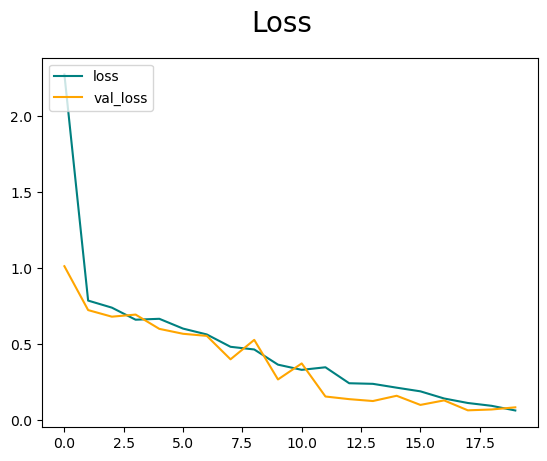

In [35]:
fig=plt.figure()
plt.plot(hist.history['loss'],color='teal',label='loss')
plt.plot(hist.history['val_loss'],color='orange',label='val_loss')
fig.suptitle('Loss',fontsize=20)
plt.legend(loc='upper left')
plt.show()

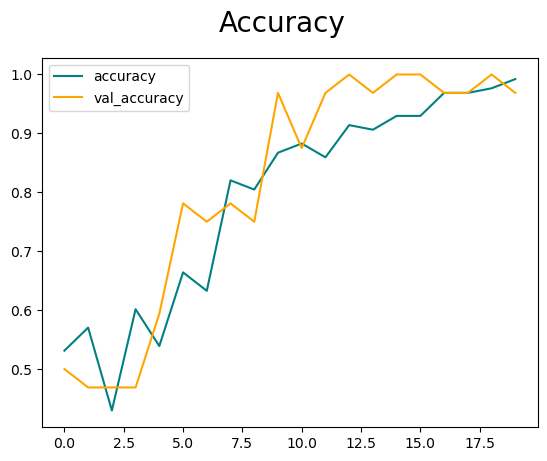

In [36]:
fig=plt.figure()
plt.plot(hist.history['accuracy'],color='teal',label='accuracy')
plt.plot(hist.history['val_accuracy'],color='orange',label='val_accuracy')
fig.suptitle('Accuracy',fontsize=20)
plt.legend(loc='upper left')
plt.show()

In [37]:
from tensorflow.keras.metrics import Precision,Recall,BinaryAccuracy

In [38]:
pre=Precision()
re=Recall()
acc=BinaryAccuracy()

In [39]:
for batch in test.as_numpy_iterator():
    x,y = batch
    y_pred = model.predict(x)
    pre.update_state(y,y_pred)
    re.update_state(y,y_pred)
    acc.update_state(y,y_pred)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 200ms/step


In [40]:
print(f'Precision : {pre.result().numpy()} , Recall : {re.result().numpy()} , Accuracy : {acc.result().numpy()}')

Precision : 1.0 , Recall : 1.0 , Accuracy : 1.0


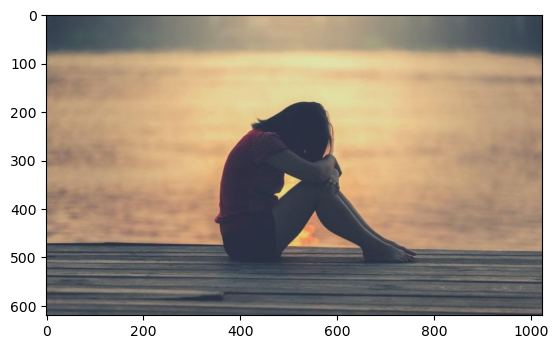

In [115]:
img = cv2.imread('loneliness.jpg')
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))
plt.show()

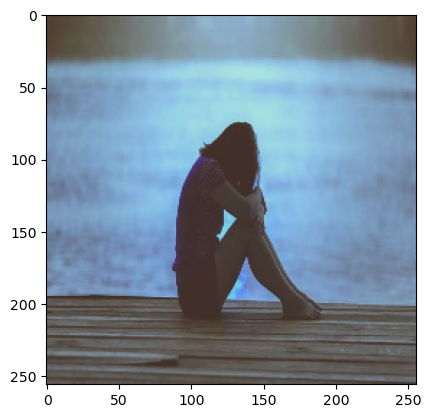

In [116]:
resize = tf.image.resize(img,(256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [117]:
resize.shape

TensorShape([256, 256, 3])

In [118]:
np.expand_dims(resize/255,0)

array([[[[0.33193934, 0.28291973, 0.21625306],
         [0.3372549 , 0.28627452, 0.22745098],
         [0.327451  , 0.27450982, 0.22352941],
         ...,
         [0.34231004, 0.29132965, 0.2364277 ],
         [0.34117648, 0.2901961 , 0.23529412],
         [0.3358609 , 0.28488052, 0.22997855]],

        [[0.32915136, 0.28013173, 0.21346508],
         [0.33333334, 0.28235295, 0.22352941],
         [0.32352942, 0.27058825, 0.21960784],
         ...,
         [0.3254902 , 0.27450982, 0.21960784],
         [0.3350337 , 0.2840533 , 0.22915135],
         [0.32889092, 0.27791053, 0.22300857]],

        [[0.3254902 , 0.2764706 , 0.20980392],
         [0.33028492, 0.27930453, 0.22048101],
         [0.320481  , 0.26753983, 0.21655944],
         ...,
         [0.3254902 , 0.27450982, 0.21960784],
         [0.32832414, 0.27734375, 0.22244179],
         [0.3224418 , 0.2714614 , 0.21655944]],

        ...,

        [[0.35687807, 0.32550552, 0.29805455],
         [0.350337  , 0.31896445, 0.29151347]

In [119]:
y_pred=model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 140ms/step


In [120]:
y_pred


array([[0.7031838]], dtype=float32)

In [121]:
if y_pred > 0.5:
    print("Person is sad")
else:
    print("person is happy")


Person is sad


In [122]:
from tensorflow.keras.models import load_model

In [73]:
model.save(os.path.join('models','happysadmodel.h5'))

In [123]:
new_model = load_model(os.path.join('models','happysadmodel.h5'))

In [124]:
y_pred_new=new_model.predict(np.expand_dims(resize/255,0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 206ms/step


In [125]:
if y_pred > 0.5:
    print("Person is sad")
else:
    print("person is happy")

Person is sad
